In [1]:
import pandas as pd

DATA = '/kaggle/input/reliance-stocks-daily-update-from-2005/reliance_stock.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Volume,year
0,2024-12-30,1219.65,1223.35,1208.65,1210.90,314452,2024
1,2024-12-27,1216.65,1227.60,1216.65,1220.95,653086,2024
2,2024-12-26,1224.65,1228.00,1214.45,1216.60,556935,2024
3,2024-12-24,1231.90,1233.45,1221.45,1223.50,268064,2024
4,2024-12-23,1217.25,1227.00,1213.15,1222.10,3332773,2024


Let's look at our price/volume correlations first.

In [2]:
df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999587,0.999455,0.999138,-0.048401
High,0.999587,1.000000,0.999267,0.999618,-0.046976
Low,0.999455,0.999267,1.000000,0.999553,-0.049519
Close,0.999138,0.999618,0.999553,1.000000,-0.048218
Volume,-0.048401,-0.046976,-0.049519,-0.048218,1.000000


What do we see? First we see that while all of our daily prices are highly correlated, none of them are the same, meaning we have no redundant data. Second we see that the price and volume are essentially uncorrelated. 

Let's look at the closing price time series.

<Axes: xlabel='Date', ylabel='Close'>

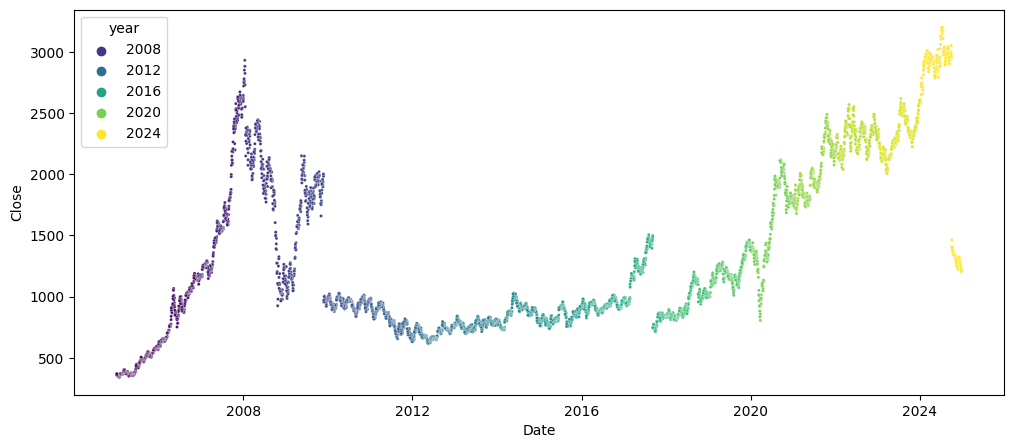

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(palette='viridis', s=5, data=df, x='Date', y='Close', hue='year')

This is an interesting looking price time series. The stock has periodic run-ups, but also multiple crashes.

What do the daily price volumes look like?

<Axes: xlabel='Date', ylabel='Volume'>

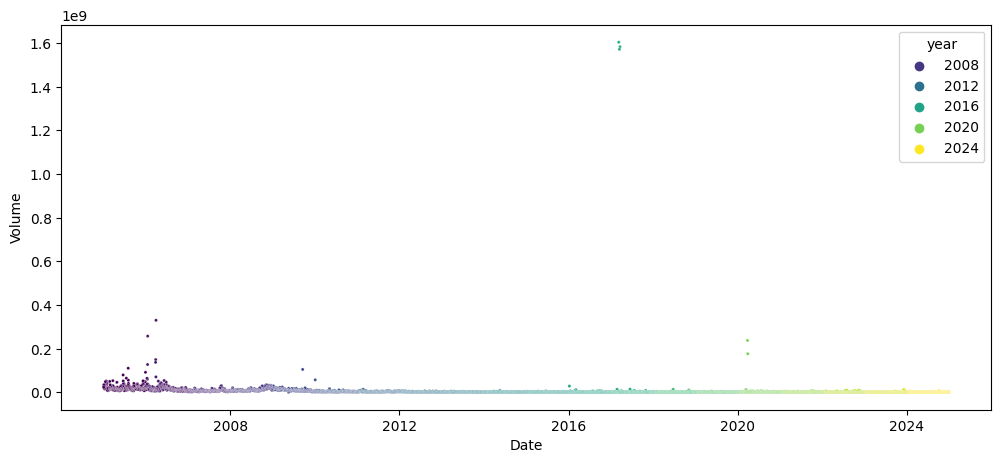

In [4]:
plt.figure(figsize=FIGSIZE)
scatterplot(palette='viridis', s=5, data=df, x='Date', y='Volume', hue='year')

We see a couple of substantial outliers; let's use a log plot to reveal smaller structures in the curve on a relative basis.

<Axes: xlabel='Date', ylabel='Volume'>

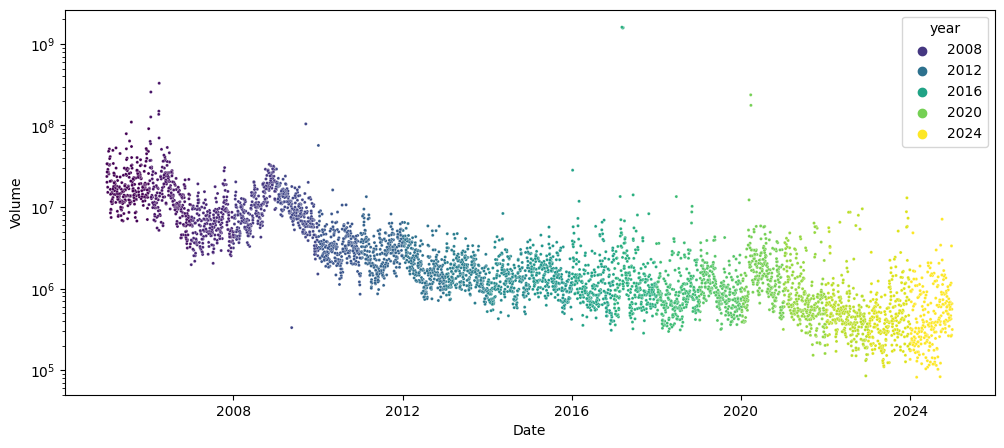

In [5]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', s=5, data=df, x='Date', y='Volume', hue='year')

If we plot the log of the volume as a function of the date, we see that in general volumes have declined over time, even though prices have gone up and down. Let's look at the relationship between the prices and volumes on a daily basis.

<Axes: xlabel='Close', ylabel='Volume'>

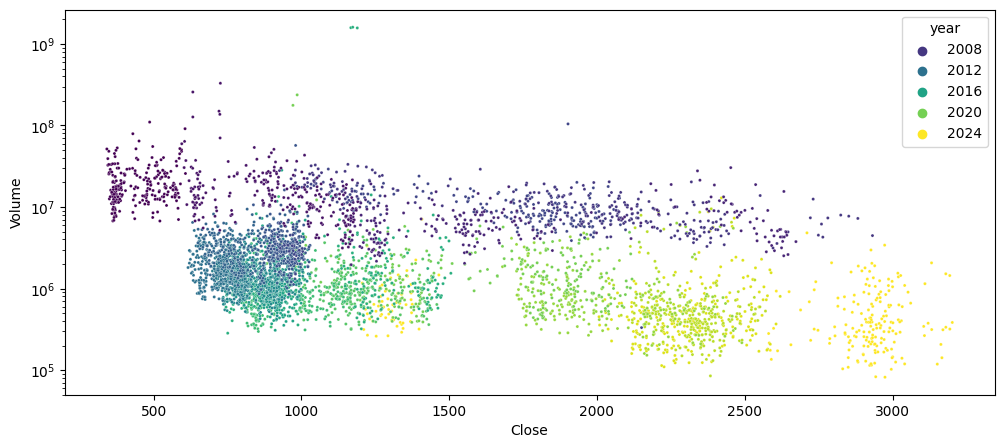

In [6]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', s=5, data=df, x='Close', y='Volume', hue='year')

If we plot the log of the volume as a function of the closing price, we see several things: early volumes are higher, generally, as we saw above. Second, there's a region of stability where prices are between 500 and 1000 and volumes are pretty stable. And finally, we do see that volumes generally decline as a function of price, which is not surprising.

<Axes: xlabel='Close', ylabel='Volume'>

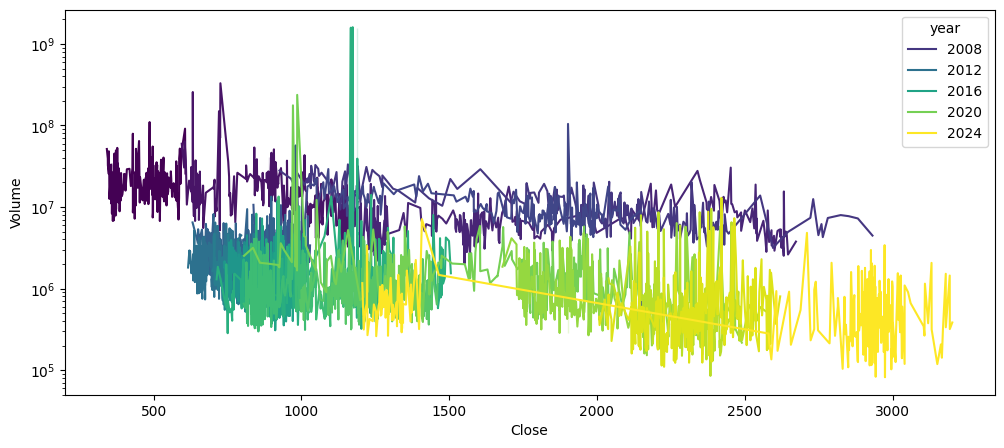

In [7]:
import warnings
from seaborn import lineplot

warnings.filterwarnings(action='ignore', category=FutureWarning)
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
lineplot(palette='viridis', data=df, x='Close', y='Volume', hue='year')

If we use a line plot instead of a scatter plot, we can see some of the serial correlation in prices.